In [6]:
#!/usr/bin/env python3

import os
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import sys
# sys.path.insert(0, '/Users/aymericvie/Documents/GitHub/evology/evology/data')
# print(sys.path)

# Import the data
df = pd.read_csv("/Users/aymericvie/Documents/GitHub/evology/evology/data/run_data.csv")
print(df)

       Unnamed: 0      Gen   Price    Mismatch  Dividends  RDividend  \
0               0      0.0  102.95 -862.733816   0.003866  -0.204775   
1               1      1.0  103.47 -142.443441   0.003863  -0.141653   
2               2      2.0  104.07  844.845101   0.003884   0.871053   
3               3      3.0  104.96  505.768329   0.003897   0.534000   
4               4      4.0  105.55  761.128508   0.003894  -0.131199   
...           ...      ...     ...         ...        ...        ...   
14974       14974  14974.0  558.86  188.084627   0.020542   0.179847   
14975       14975  14975.0  559.36  109.764083   0.020504  -0.298248   
14976       14976  14976.0  558.43 -150.166566   0.020654   1.160464   
14977       14977  14977.0  562.33 -194.232577   0.020575  -0.618657   
14978       14978  14978.0  560.58 -222.097296   0.020674   0.760853   

              Volume  Rep       Pos+  Pos-  ...  MeanReturn  Spoils     TimeA  \
0      230772.138253  0.0  1500000.0   0.0  ...   -0.0

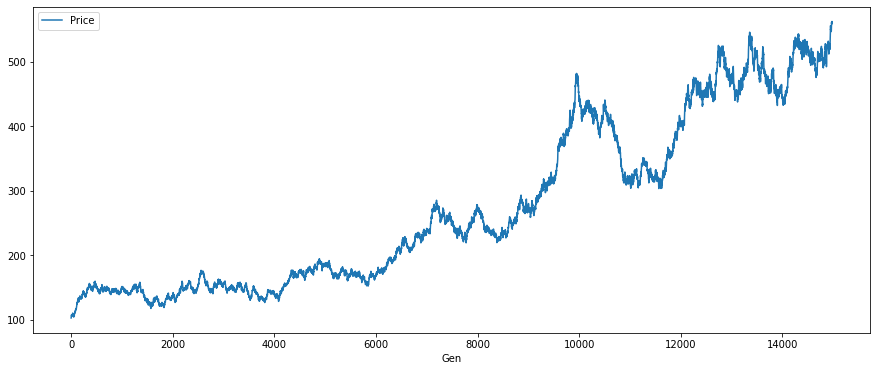

In [7]:

df.plot(x="Gen", y = ["Price"],
        kind="line", figsize=(15, 6))
plt.show()

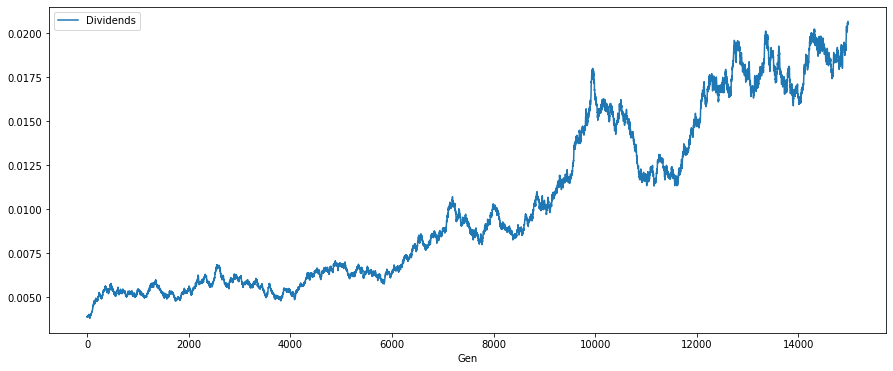

In [8]:
df.plot(x="Gen", y = ["Dividends"],
        kind="line", figsize=(15, 6))
plt.show()



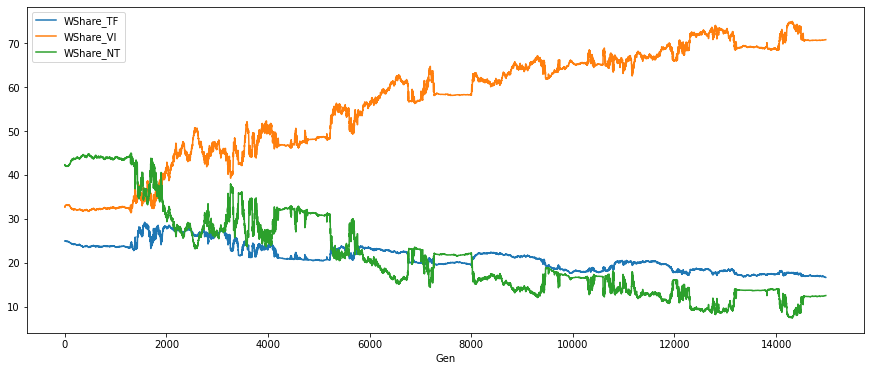

In [9]:
df.plot(x="Gen", y = ["WShare_TF", "WShare_VI", "WShare_NT"],
        kind="line", figsize=(15, 6))
plt.show()



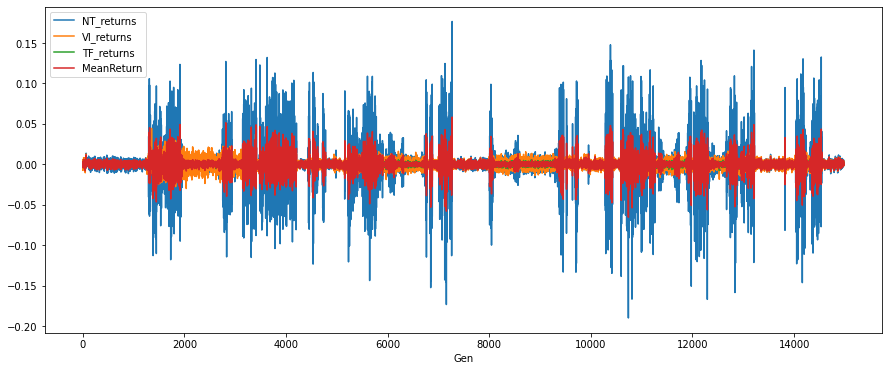

In [10]:
df.plot(x="Gen", y = ["NT_returns", "VI_returns", "TF_returns", 'MeanReturn'],
        kind="line", figsize=(15, 6))
plt.show()

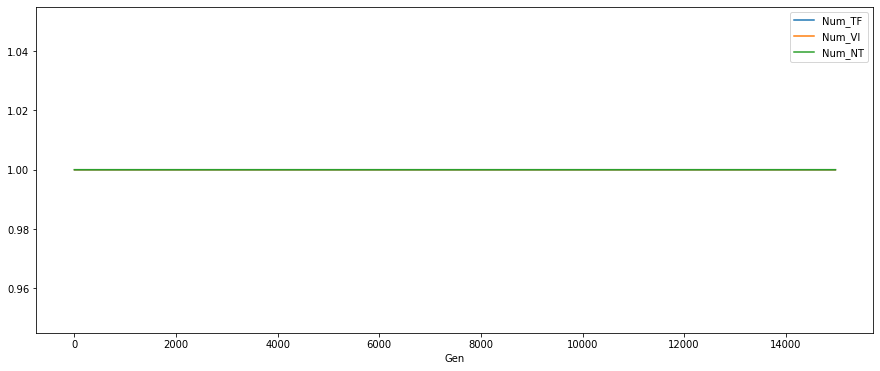

In [11]:
# Basic plots

df.plot(x="Gen", y = ["Num_TF", "Num_VI", "Num_NT"],
        kind="line", figsize=(15, 6))
plt.show()

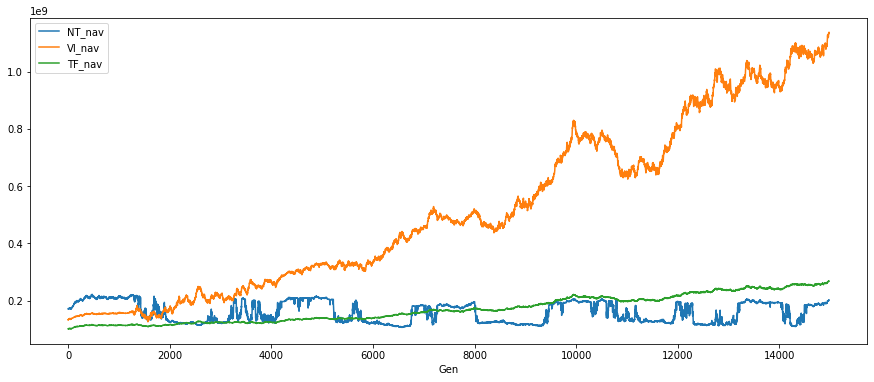

In [12]:
''' NAV '''
df.plot(x="Gen", y = ["NT_nav", "VI_nav", "TF_nav"],
        kind="line", figsize=(15, 6))
plt.show()


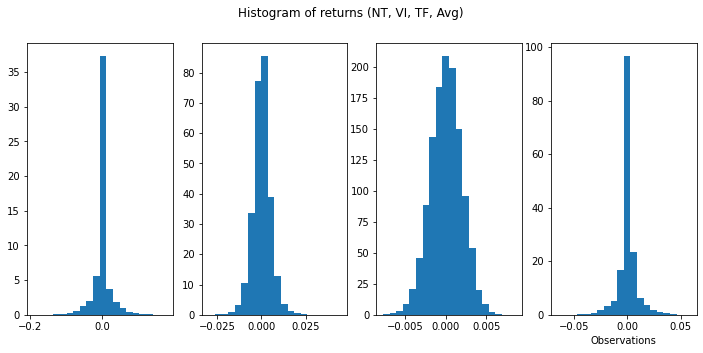

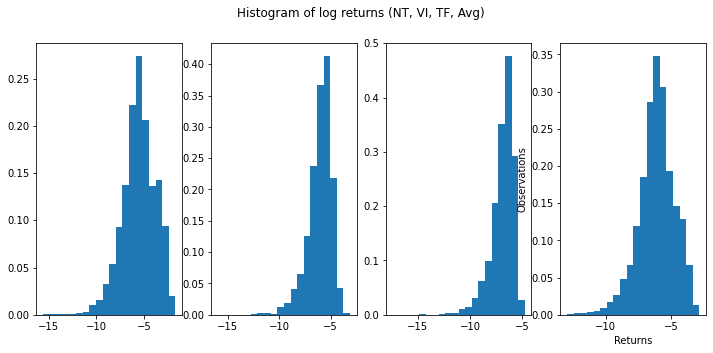

In [36]:
''' Histogram of the strategy returns '''

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 5))
fig.suptitle('Histogram of returns (NT, VI, TF, Avg)')
ax1.hist(df['NT_returns'], bins = 20, density = True)
ax2.hist(df['VI_returns'], bins = 20, density = True)
ax3.hist(df['TF_returns'], bins = 20, density = True)
ax4.hist(df['MeanReturn'], bins = 20, density = True)
ax4.set_xlabel('Return')
ax4.set_xlabel('Observations')
plt.show()

fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 5))
fig.suptitle('Histogram of log returns (NT, VI, TF, Avg)')
ax1.hist(np.log(df['NT_returns']), bins = 20, density = True)
ax2.hist(np.log(df['VI_returns']), bins = 20, density = True)
ax3.hist(np.log(df['TF_returns']), bins = 20, density = True)
ax4.hist(np.log(df['MeanReturn']), bins = 20, density = True)
ax4.set_ylabel('Observations')
ax4.set_xlabel('Returns')
plt.show()


# fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize = (12, 5))
# fig.suptitle('Histogram of returns (NT, VI, TF, Avg)')
# df.hist(column='NT_returns', density = True, ax = ax1)
# df.hist(column='VI_returns', density = True, ax = ax2)
# df.hist(column='TF_returns', density = True, ax = ax3)
# df.hist(column='MeanReturn', density = True, ax = ax4)
# plt.show()



Bin

In [14]:




# fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize = (10, 5), sharex = True)
# fig.suptitle('Price, Positive positions, negative positions')
# ax1.plot(df["Price"])
# ax2.plot(df["Pos+"])
# ax3.plot(df["Pos-"])
# ax1.set_xlabel('Time (days)')
# plt.show()



# df['NT_returns_ema'] = df['NT_returns'].ewm(span = 252).mean()
# df['VI_returns_ema'] = df['VI_returns'].ewm(span = 252).mean()
# df['TF_returns_ema'] = df['TF_returns'].ewm(span = 252).mean()

# df.plot(x="Gen", y = ["NT_returns_ema", "VI_returns_ema", "TF_returns_ema"],
#         kind="line", figsize=(15, 6), ylim=[-0.01,0.01])
# plt.show()




# df['WShare_NT_mag'] = abs(np.diff(df['WShare_NT'], prepend = 0))
# df['WShare_VI_mag'] = abs(np.diff(df['WShare_VI'], prepend = 0))
# df['WShare_TF_mag'] = abs(np.diff(df['WShare_TF'], prepend = 0))
# df['Sum_rel_mag'] = df['WShare_NT_mag'] + df['WShare_VI_mag'] + df['WShare_TF_mag']


# df.plot(x="Gen", y = ['Sum_rel_mag'],
#         kind="line", figsize=(15, 6), ylim = [0, 20], ylabel = 'Absolute sum of changes in relative wealth')
# plt.show()


# df['WShare_NT_mag_sq'] = np.square(np.diff(df['WShare_NT'], prepend = 0))
# df['WShare_VI_mag_sq'] = np.square(np.diff(df['WShare_VI'], prepend = 0))
# df['WShare_TF_mag_sq'] = np.square(np.diff(df['WShare_TF'], prepend = 0))
# df['Sum_rel_mag_sq'] = df['WShare_NT_mag_sq'] + df['WShare_VI_mag_sq'] + df['WShare_TF_mag_sq']
# df['Sum_rel_mag_sq_ema'] = df["Sum_rel_mag_sq"].ewm(span = 252).mean()


# df.plot(x="Gen", y = ['Sum_rel_mag_sq', 'Sum_rel_mag_sq_ema'],
#         kind="line", figsize=(15, 6), ylim = [0, 20], 
#         ylabel = 'Squared sum of changes in relative wealth', 
#         title='Squared sum of changes in relative wealth over time')
# plt.show()

# fig, (ax1, ax2) = plt.subplots(2, 1, figsize = (10, 5), sharex = True)
# fig.suptitle('Strategy wealth share and magnitude of changes')
# ax1.plot(df["WShare_TF"], label = 'Wealth share TF')
# ax1.plot(df["WShare_VI"], label = 'Wealth share VI')
# ax1.plot(df["WShare_NT"], label = 'Wealth share NT')
# ax2.plot(df["Sum_rel_mag_sq"], label = 'Variability')
# ax2.plot(df["Sum_rel_mag_sq_ema"], label = 'Variability (EMA)')
# ax1.legend()
# ax2.legend()
# ax2.set_ylim(0,15)
# ax2.set_xlabel('Time (days)')
# ax1.set_title('Wealth shares of strategies')
# ax2.set_title('Squared sum of wealths share changes')
# plt.show()